In [2]:
import numpy as np
import Utils
import matplotlib.pyplot as plt

In [3]:
npz_file_path = "Duffing_Soulution\datasets\gamma=0.20 t_span=(0, 100000) initial_conditions=[1, 0].npy"
loaded_data = Utils.read_npz_file(npz_file_path)

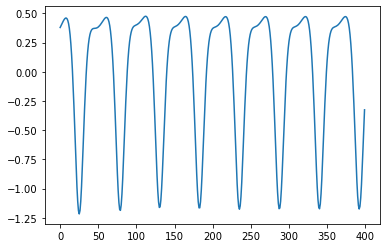

In [6]:
plt.plot(loaded_data[:400])

In [71]:
# Choose a wavelet family and decomposition level
wavelet = 'db4'  # Example: Daubechies 4
level = 1
noisy = loaded_data[:200]+np.random.rand(200)/7
# Perform wavelet decomposition
coeffs = pywt.wavedec(noisy, wavelet, level=level)


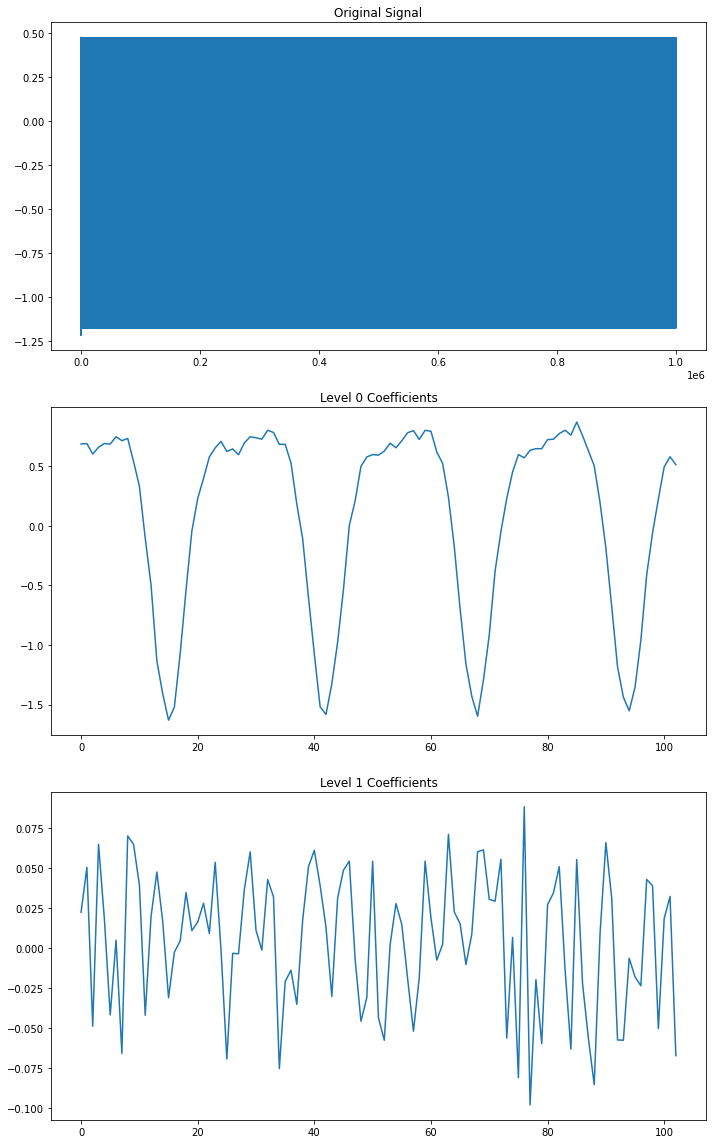

In [72]:
# Visualize the original signal
plt.figure(figsize=(10, 16))
plt.subplot(level + 2, 1, 1)
plt.plot( loaded_data)
plt.title('Original Signal')

# Visualize the wavelet coefficients
for i in range(level + 1):
    plt.subplot(level + 2, 1, i + 2)
    plt.plot(coeffs[i])
    plt.title(f'Level {i} Coefficients')

plt.tight_layout()
plt.show()


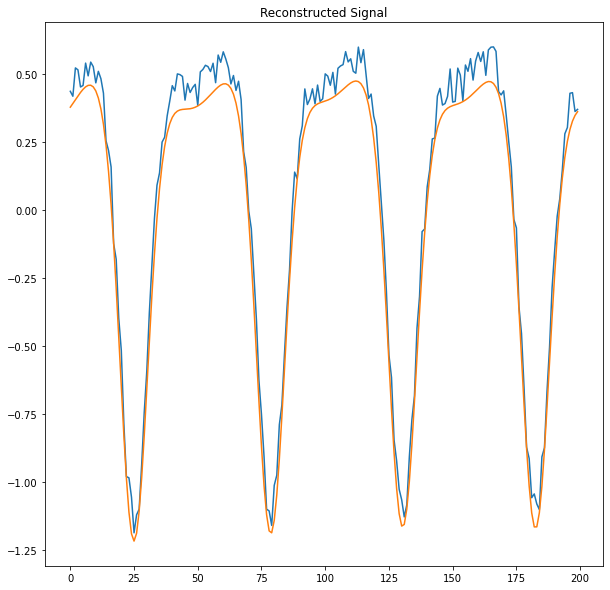

In [76]:
reconstructed_signal = pywt.waverec(coeffs[:], wavelet)
plt.figure(figsize=(10, 10))
plt.plot(reconstructed_signal[:200])
plt.plot(loaded_data[:200])
plt.title('Reconstructed Signal')
plt.show()


In [78]:
import numpy as np

def calculate_fft(signal, sampling_rate):
    n = len(signal)
    fft_result = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(n, d=1/sampling_rate)
    magnitudes = np.abs(fft_result)
    
    return frequencies, magnitudes

# # Example usage
sampling_rate = 44100  # Replace with your sampling rate
# time = np.linspace(0, 1, sampling_rate, False)  # Create a time array
# frequency = 440  # Frequency of the sine wave in Hz
# signal = 0.5 * np.sin(2 * np.pi * frequency * time)  # Generate a sine wave

frequencies, magnitudes = calculate_fft(noisy, sampling_rate)
print("Frequencies:", frequencies[:10])
print("Magnitudes:", magnitudes[:10])


Frequencies: [   0.   220.5  441.   661.5  882.  1102.5 1323.  1543.5 1764.  1984.5]
Magnitudes: [10.7806048   4.83557695  7.75637887 14.02976165 66.08981409 12.73180314
 12.74164922 18.30965238 26.69059655  6.55229774]
